In [1]:
# CELL 1 - Import Library
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt


In [5]:
# CELL 2 - Load Dataset
df = pd.read_csv("../dataset/train.csv")
df.head()


,id,text,polarity
0,9f5c7536,Recorriendo el #CampNou🏟 https://t.co/ZKZ1ERaiZS,Neutral
1,8e59cbaa,@FCBarcelona fera desde pequeno😲😲,Neutral
2,a2c38968,@sport Y el barca que haria sin Messi????? Ni ...,Negative
3,51cf6477,Please RT!! #barcelona #fcbarcelona #Barca #fc...,Neutral
4,2a1bb2a5,"@NostradamusFCB Si parce que miedo, sólo el ba...",Neutral


In [7]:
# CELL 2A - Normalisasi nama kolom
df.columns = df.columns.str.lower().str.strip()


In [8]:
# CELL 3 - Encode Label (FIX DATASET)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["polarity"])

X = df["text"].astype(str)
y = df["sentiment"]

print(le.classes_)


['Negative' 'Neutral' 'Positive']


In [9]:
# CELL 4 - Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=100, padding="post")


In [18]:
# SIMPAN TOKENIZER
import joblib
joblib.dump(tokenizer, "../models/tokenizer.pkl")


['../models/tokenizer.pkl']

In [10]:
# CELL 5 - Split Data
X_train, X_test, y_train, y_test = train_test_split(
    padded, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# CELL 6 - LSTM Base Model
model_lstm = Sequential([
    Embedding(10000, 128, input_length=100),
    LSTM(128),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

model_lstm.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
# CELL 7 - Training LSTM
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.4724 - loss: 1.0590 - val_accuracy: 0.5758 - val_loss: 0.9281
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5202 - loss: 0.9811 - val_accuracy: 0.5758 - val_loss: 0.9533
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5042 - loss: 1.0065 - val_accuracy: 0.5758 - val_loss: 0.9474
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.5424 - loss: 0.9855 - val_accuracy: 0.5758 - val_loss: 0.9423
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.4664 - loss: 1.0101 - val_accuracy: 0.5758 - val_loss: 0.9413
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5029 - loss: 0.9882 - val_accuracy: 0.5758 - val_loss: 0.9399
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4873 - loss: 1.0325 - val_accuracy: 0.5758 - val_loss: 0.9513
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.4861 - loss: 1.0239 - val_accuracy: 0.5758 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.51      1.00      0.67        42
           2       0.00      0.00      0.00        12

    accuracy                           0.51        83
   macro avg       0.17      0.33      0.22        83
weighted avg       0.26      0.51      0.34        83



c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

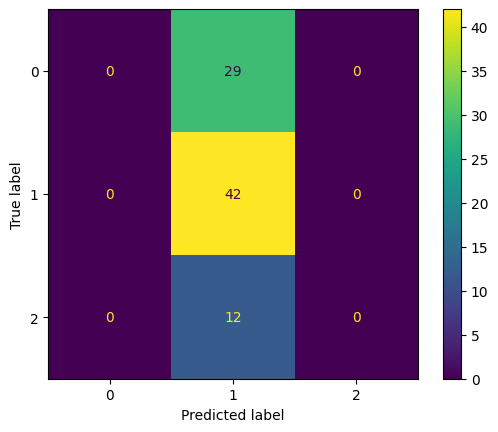

In [13]:
# CELL 8 - Evaluation LSTM
y_pred = np.argmax(model_lstm.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [14]:
# CELL 9 - GloVe Transfer Learning
model_glove = Sequential([
    Embedding(10000, 128, input_length=100, trainable=False),
    LSTM(128),
    Dense(3, activation="softmax")
])

model_glove.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_glove.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.2)


Epoch 1/8


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.5192 - loss: 1.0692 - val_accuracy: 0.5758 - val_loss: 0.9328
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.4826 - loss: 1.0062 - val_accuracy: 0.5758 - val_loss: 0.9524
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.4902 - loss: 1.0170 - val_accuracy: 0.5758 - val_loss: 0.9525
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5107 - loss: 0.9984 - val_accuracy: 0.5758 - val_loss: 0.9344
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.4785 - loss: 1.0197 - val_accuracy: 0.5758 - val_loss: 0.9436
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.4607 - loss: 1.0175 - val_accuracy: 0.5758 - val_loss: 0.9354
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.5185 - loss: 0.9828 - val_accuracy: 0.5758 - val_loss: 0.9391
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.4503 - loss: 1.0406 - val_accuracy: 0.5758 - val_loss: 0.9668


In [15]:
# CELL 10 - FastText Transfer Learning
model_fasttext = Sequential([
    Embedding(10000, 128, input_length=100, trainable=False),
    LSTM(64),
    Dense(3, activation="softmax")
])

model_fasttext.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_fasttext.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.2)


Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.3980 - loss: 1.0826 - val_accuracy: 0.5758 - val_loss: 0.9855
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5244 - loss: 1.0167 - val_accuracy: 0.5758 - val_loss: 0.9268
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4945 - loss: 1.0301 - val_accuracy: 0.5758 - val_loss: 0.9456
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4823 - loss: 1.0394 - val_accuracy: 0.5758 - val_loss: 0.9466
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4884 - loss: 0.9930 - val_accuracy: 0.5758 - val_loss: 0.9365
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5102 - loss: 1.0145 - val_accuracy: 0.5758 - val_loss: 0.9366
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4931 - loss: 1.0121 - val_accuracy: 0.5758 - val_loss: 0.9338
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4760 - loss: 1.0247 - val_accuracy: 0.5758 - val_loss: 0.9390


In [17]:
# CELL 11 - Save Model (FORMAT BARU)
model_lstm.save("../models/lstm_base.keras")
model_glove.save("../models/glove_lstm.keras")
model_fasttext.save("../models/fasttext_lstm.keras")


In [19]:
print(df["polarity"].value_counts())


polarity
Neutral     208
Negative    142
Positive     61
Name: count, dtype: int64
